In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [6]:
data = pd.read_csv('data.csv',on_bad_lines='skip')
# using the option on_bad_lines = skip since some lines are not in the correct format
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
#check unique values in strnght
data.strength.unique()

array([1, 2, 0], dtype=int64)

In [9]:
#check if we have null of duplicates values
data.isna().any()

password     True
strength    False
dtype: bool

In [11]:
data.shape

(669640, 2)

In [12]:
#Remove NaN password
data.dropna(inplace = True)

In [13]:
data.shape

(669639, 2)

In [16]:
#Check if any duplicated values
data.duplicated().any()

False

<AxesSubplot:xlabel='strength', ylabel='count'>

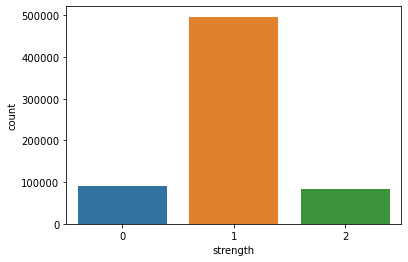

In [17]:
#how many classes groups are there?
sns.countplot(x=data["strength"])

In [18]:
password_tuple = np.array(data)

In [22]:
#shuffle data
shuffled_data = data.sample(frac=1)

In [23]:
password_tuple_shuffled = np.array(shuffled_data)

In [24]:
password_tuple_shuffled

array([['cixaryz515', 1],
       ['yxipoko218', 1],
       ['Serenity12118809980', 2],
       ...,
       ['powuk416', 1],
       ['ufo2ku0', 0],
       ['house111', 1]], dtype=object)

In [25]:
#defining x and y 
x = [label[0] for label in password_tuple_shuffled]
y = [label[1] for label in password_tuple_shuffled]

### Applying TF-IDF on Data

In [40]:
def word_devide_char(word):
    return [letter for letter in word]

In [42]:
x_char = []
for value in x:
    x_char.append(word_devide_char(value))

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = x
vectorizer = TfidfVectorizer(tokenizer = word_devide_char)
X = vectorizer.fit_transform(corpus)


<669639x153 sparse matrix of type '<class 'numpy.float64'>'
	with 5645406 stored elements in Compressed Sparse Row format>

In [53]:
X.shape

(669639, 153)

In [57]:
vectorizer.get_feature_names()

['\x01',
 '\x02',
 '\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¢',
 '¤',
 '¦',
 '§',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 'ƒ',
 '—',
 '‚',
 '‡',
 '…',
 '‹',
 '›',
 '™']

### Apply Logistic Regression 

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
from sklearn.linear_model import LogisticRegression

In [73]:
clf = LogisticRegression(random_state = 0, multi_class = "multinomial")

In [74]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

#### Test Model

In [77]:
example_password = "Diocane93@"
pred = vectorizer.transform(np.array([example_password]))
clf.predict(pred)

array([2])

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [80]:
cm = confusion_matrix(y_test,clf.predict(X_test))

In [81]:
cm

array([[ 5134, 12627,    10],
       [ 3752, 93198,  2697],
       [   35,  5199, 11276]], dtype=int64)

In [82]:
accuracy_score(y_test,clf.predict(X_test))

0.8184098918822054